## Final Project Submission

Please fill out:
* Student name: **Abass Ibrahim**
* Student pace: **Full time**
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Aim
Our stakeholders are identified as "Potential property investors who aim to buy and sell". <br>
Our aim is to create a regression model that predicts house prices based on a number of features. <br>
For the entire process, we shall be using the **CRoss-Industry Standard Process for Data Mining (CRISP-DM)**. <br>
As such, are target variable is **price**.

## Data Understanding

### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from math import sin, cos, sqrt, atan2, radians

### Import the house data csv

In [2]:
orig_data = pd.read_csv('data/kc_house_data.csv')

# Firstly, we check that all of the columns to check their data types.
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
orig_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# We should state our target variable.
# We'll also divide by 1,000,000 to remove scientific notation
y = orig_data['price'] / 1000000

# Of the remaining columns, all could act as features except for the id column. So this should be dropped.
feature_df = orig_data.drop(['id', 'price'], axis=1)

## Holdout test

In [5]:
# We have now established our target and feature variables.
# Before any cleaning is done, we shall split our data into test and train.
X_train, X_test, y_train, y_test = train_test_split(
                                                    feature_df,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1
)

In [6]:
# From now on we'll be working mainly with X_train

# From the column_names.md, we can see that these features would be our categorical variables
cat_X = ['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

# We'll isolate the categorical variables
cat_df = X_train[cat_X]

# We can drop those from the feature_df dataframe so we can have only continuous variables
continuous_X = X_train.drop(cat_X, axis=1)


## Data Cleaning
Now we have a better idea of the data that we are dealing with, we should start cleaning it in preparation for our model.

In [7]:
# Let's have a look at the column values again in our continuous and categorical variables
continuous_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8093 to 235
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    15117 non-null  int64  
 1   sqft_lot       15117 non-null  int64  
 2   sqft_above     15117 non-null  int64  
 3   sqft_basement  15117 non-null  object 
 4   lat            15117 non-null  float64
 5   long           15117 non-null  float64
 6   sqft_living15  15117 non-null  int64  
 7   sqft_lot15     15117 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [8]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8093 to 235
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          15117 non-null  object 
 1   bedrooms      15117 non-null  int64  
 2   bathrooms     15117 non-null  float64
 3   floors        15117 non-null  float64
 4   waterfront    13442 non-null  object 
 5   view          15079 non-null  object 
 6   condition     15117 non-null  object 
 7   grade         15117 non-null  object 
 8   yr_built      15117 non-null  int64  
 9   yr_renovated  12423 non-null  float64
 10  zipcode       15117 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


In [9]:
# Interestingly, sqft_basement is registered as an object when it should be numerical
continuous_X['sqft_basement'].value_counts()

0.0       8948
?          329
600.0      153
700.0      150
500.0      146
          ... 
1816.0       1
1248.0       1
2400.0       1
861.0        1
2120.0       1
Name: sqft_basement, Length: 276, dtype: int64

When we run the value_counts we see that there is a "?" which has 454 counts. Evidently an NaN value.

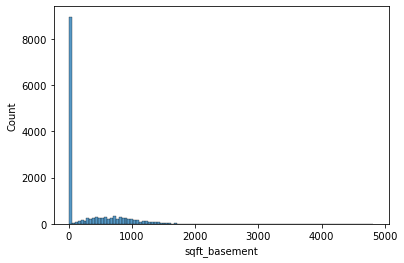

In [10]:
# We'll make a histogram to look at the distributions of the data in this column
sns.histplot(continuous_X.loc[continuous_X['sqft_basement'] != '?']['sqft_basement'].astype(float));

From the graph above we can see that 0 is clearly the modal value. And there are some extreme values towards 5000. <br>
Both the mode and median are 0. In this case, we shall use the modal of 0.
<br>
And then we shall convert that whole column into integers.

In [11]:
# We firstly replace all values of "?" with 0
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].apply(lambda x: 0 if x == '?' else x)

# And then we turn the values in the column to floats
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].astype(float)

In [12]:
# Whilst the data types check out, we can see there are missing values in 3 columns:

# waterfront, view & yr_renovated

# We shall calculate the percentages of values that are na within each column

print(len(cat_df[cat_df['waterfront'].isna() == True]) / len(cat_df['waterfront']))
print(len(cat_df[cat_df['view'].isna() == True]) / len(cat_df['view']))
print(len(cat_df[cat_df['yr_renovated'].isna() == True]) / len(cat_df['yr_renovated']))


0.1108024078851624
0.002513726268439505
0.17820996229410596


In [13]:
# For each of the columns, we shall simply use their modal values to fill the na values.

# The largest proportion of na values is 17% so replacing values with the modal values should not be problematic.

waterfront_mode = cat_df['waterfront'].mode()[0]
view_mode = cat_df['view'].mode()[0]
yr_renovated_mode = cat_df['yr_renovated'].mode()[0]

cat_df['waterfront'].fillna(waterfront_mode, inplace = True)
cat_df['view'].fillna(view_mode, inplace = True)
cat_df['yr_renovated'].fillna(yr_renovated_mode, inplace = True)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
# The values in waterfront, view and condition are all strings.
# We can change them into numerical values based on relative rank.

view_values = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_values = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
waterfront_values = ['NO', 'YES']

values_dict = {'view': view_values, 'condition': condition_values, 'waterfront': waterfront_values}

for column_name, values_list in values_dict.items():
    for num, value in enumerate(values_list):
        cat_df.loc[cat_df[column_name] == value, column_name] = int(num)
    cat_df[column_name] = cat_df[column_name].astype(int)
cat_df.head()

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-14-34bdb125763d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[column_name] = cat_df[column_name].astype(int)


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
8093,7/10/2014,2,2.00,1.0,0,0,4,6 Low Average,1940,0.0,98146
13884,11/14/2014,3,1.00,1.0,0,0,2,6 Low Average,1961,0.0,98146
406,8/6/2014,3,2.00,3.0,0,0,2,8 Good,2001,0.0,98103
21317,5/8/2015,4,3.25,2.0,0,2,2,11 Excellent,2015,0.0,98006
7766,10/7/2014,3,1.50,1.0,0,0,2,7 Average,1962,0.0,98198


In [15]:
# We'll also check to see if any modal 0 values in any of the columns. These may actually be NaN values
for column in cat_df.columns:
    print(column, list(cat_df[column].mode()))
    
# A house may not have a basement thus has a 0 value.

date ['6/23/2014']
bedrooms [3]
bathrooms [2.5]
floors [1.0]
waterfront [0]
view [0]
condition [2]
grade ['7 Average']
yr_built [2014]
yr_renovated [0.0]
zipcode [98103]


For categorical variables, only yr_renovated has modal 0 values. <br>
However, in context this is fine. A house may not have been revovated thus has a 0 value.

In [16]:
for column in continuous_X.columns:
    print(column, list(continuous_X[column].mode()))

sqft_living [1400]
sqft_lot [5000]
sqft_above [1300]
sqft_basement [0.0]
lat [47.6955]
long [-122.29]
sqft_living15 [1440]
sqft_lot15 [5000]


For continuous variables, only sqft_basement has modal 0 values. <br>
However, in context this is fine. A house may not have a basement thus has a 0 value.

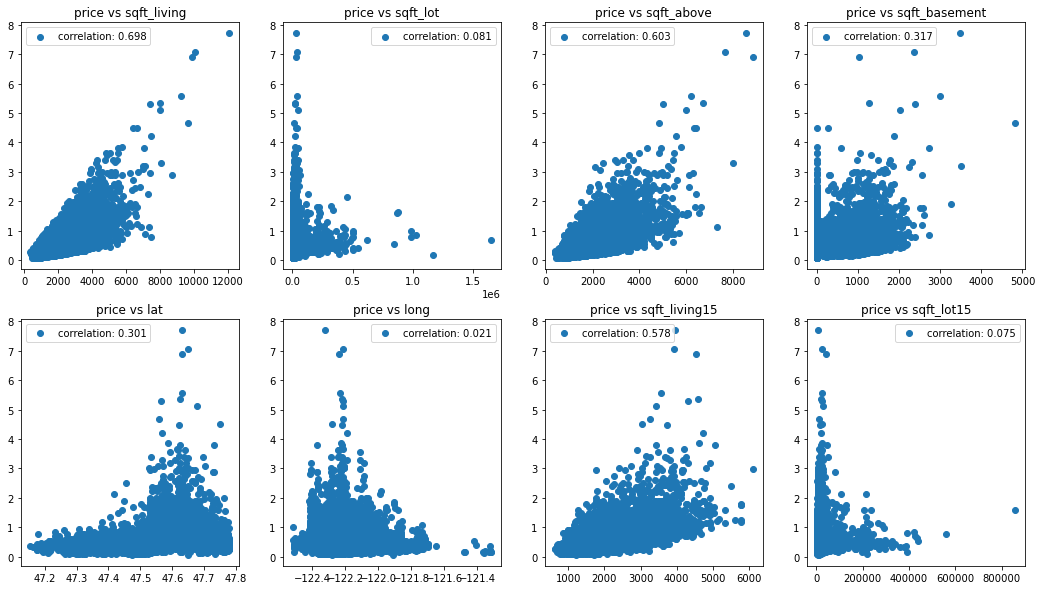

In [17]:
# Now we can plot a matrix of the continuous variables against the target variable
# The graph gives us a good idea of the distributions between each variable and the target variable.

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18,10))
for column, ax in zip(continuous_X.columns, axes.flatten()):
    
    # We'll also check the correlations of price against each variable
    corr = round(pd.concat([continuous_X[column], y_train], axis=1).corr().iloc[0,1], 3)
    ax.scatter(continuous_X[column], y_train, label = f'correlation: {corr}')
    ax.set_title(f'price vs {column}')
    ax.legend()

Clearly sqft_living is the best correlated and longitude is the worst. <br>
In addition, lot15 is very uncorrelated with price.

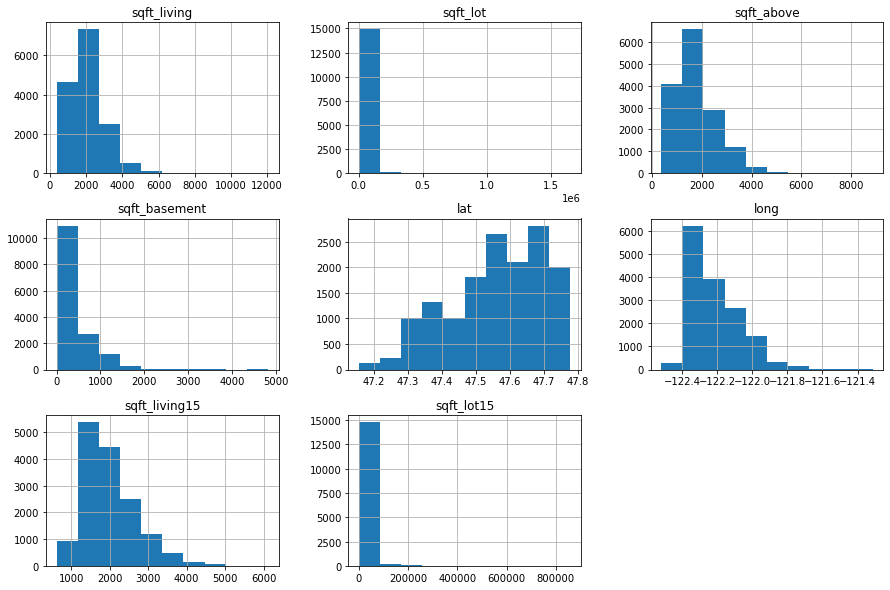

In [18]:
# We'll also take a look at the distributions of each continuous variable
continuous_X.hist(figsize=(15,10));

We can immediately see skewed distributions in all cases besides sqft_lot15 and sqft_lot <br>
To normalise these, we can take the log of their values <br>
But we should be mindful. long has negetaive values so should not be used <br>
Sqft_basement has many 0 values so cannot be used. <br>
We will also run this code later on once we've removed all 0 values in all columns <br>


In [19]:
continuous_X

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
8093,970,9750,970,0.0,47.5073,-122.372,1850,9000
13884,940,7980,940,0.0,47.5107,-122.345,1050,7980
406,1290,1213,1290,0.0,47.6609,-122.344,1290,3235
21317,5640,35006,4900,740.0,47.5491,-122.104,4920,35033
7766,1230,7500,1230,0.0,47.4202,-122.331,1260,7800
...,...,...,...,...,...,...,...,...
10955,2420,7548,1370,1050.0,47.3112,-122.376,2150,8000
17289,1060,5750,1060,0.0,47.5532,-122.372,1060,5750
5192,1540,13002,1200,0.0,47.6231,-122.044,1620,10098
12172,2420,49928,1860,560.0,47.4630,-122.008,2620,37301


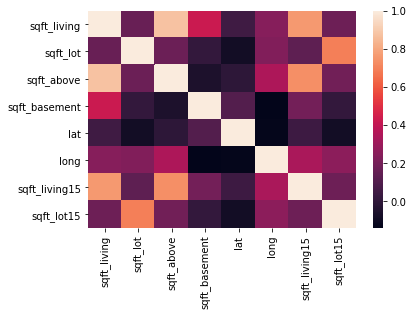

In [20]:
# We'll also create a heatmap to see which variables are highly correlated with each other.
# This is to avoid multicolinearity when making a model
sns.heatmap(continuous_X.corr());

We can filter out all variables that have a high correlation.

In [21]:
# First we'll create a dataframe based on the absolute correalation values
corr_df = continuous_X.corr().abs().stack().reset_index()

# Level_0 and level_1 refer to the variable names
# We then create a new column that is a tuple of the variable names
corr_df['pairs'] = list(zip(corr_df['level_0'], corr_df['level_1']))

# We'll make the pairs column the index
corr_df.set_index(['pairs'], inplace = True)

# We can then drop the level_0 and level_1 columns
corr_df.drop(columns = ['level_0', 'level_1'], inplace = True)

# We can then rename the '0' column to 'correlation'
corr_df.columns = ['correlation']

# From our heat map we can see that the only perfectly correlation variables are 2 of the same variables
# So we can drop rows that have a correlation of 1
corr_df = corr_df[corr_df['correlation'] != 1]

# Finally, we sort these values by correlation in descending order
corr_df.sort_values(by=['correlation'], ascending = False, inplace = True)

# We also need to get rid of duplicate values e.g. A and B is the same as B and A
corr_df.drop_duplicates(inplace = True)

# Now we can isolate those which are highly correlated
corr_df[corr_df['correlation'] >=0.75]

,correlation
pairs,
"(sqft_above, sqft_living)",0.877115
"(sqft_living15, sqft_living)",0.759246


We see that there are only 2 sets of highly correlated variables.


### Feature engineering

In [22]:
# Interestingly, we have both longitude and latitude so this opens room for creativity

# We'll create this function to help us calculate the distance between 2 points

def get_distance(point1, point2):
    R = 6370
    lat1 = radians(point1[0])  #insert value
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2- lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

# We will have to points of interest are the Centre of Seattle: (47.60457618602064, -122.32993003068658),
# and the centre of Redmond: (47.679328831807894, -122.13055895937767)
# For each record, we will calculate the distance from those points of interests and place them in a new column

continuous_X['lat_long'] = list(zip(continuous_X['lat'], continuous_X['long']))
continuous_X['Seattle_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
continuous_X['Redmond_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))

# The lat long column was temporary and only needed for the calculation. As it is a tuple, it is incompatible with sklearn
# As such we shall drop it

continuous_X.drop(columns=['lat_long'], inplace=True)

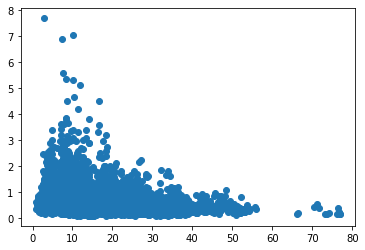

In [23]:
# Now we'll plot a graph of price against Seattle dist and Redmond dist
plt.scatter(continuous_X['Seattle_dist_km'], y_train);

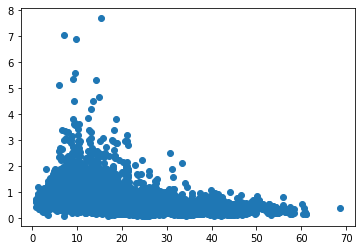

In [24]:
plt.scatter(continuous_X['Redmond_dist_km'], y_train);

In [25]:
# We can also include another feature: "average room size"
continuous_X['average_room_size'] = continuous_X['sqft_living'] / (cat_df['bathrooms'] + cat_df['bedrooms'])

# Another useful metric could be the Floor Area Ratio
continuous_X['floor_area_ratio'] = continuous_X['sqft_living'] / continuous_X['sqft_lot']


**We'll now draw our attention to the categorical variables**

In [26]:
cat_df

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
8093,7/10/2014,2,2.00,1.0,0,0,4,6 Low Average,1940,0.0,98146
13884,11/14/2014,3,1.00,1.0,0,0,2,6 Low Average,1961,0.0,98146
406,8/6/2014,3,2.00,3.0,0,0,2,8 Good,2001,0.0,98103
21317,5/8/2015,4,3.25,2.0,0,2,2,11 Excellent,2015,0.0,98006
7766,10/7/2014,3,1.50,1.0,0,0,2,7 Average,1962,0.0,98198
...,...,...,...,...,...,...,...,...,...,...,...
10955,9/17/2014,3,2.25,1.0,0,0,3,8 Good,1967,0.0,98023
17289,1/5/2015,3,1.50,1.0,0,0,1,7 Average,1981,0.0,98126
5192,8/1/2014,3,1.75,1.0,0,0,1,8 Good,1984,0.0,98074
12172,5/21/2014,3,2.50,2.0,0,0,2,8 Good,1985,0.0,98027


From a quick glance, there a few things to clean up. <br>
We can strip the string values from the grades to get only numerical values. <br>
For date, we can turn the values into years. From there, we can calculate **year sold - year built** <br>
There also appears to be a house with 33 bedrooms which seems very unlikely.

In [27]:
# There appears to be a house with 33 bedrooms. When we inspect it we see that this is probably due to a typo.
# Keeping its price in mind, we can assume that the entry was meant to be a "3"
cat_df.sort_values(by='bedrooms', ascending=False)

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
15856,6/25/2014,33,1.75,1.0,0,0,4,7 Average,1947,0.0,98103
8748,8/21/2014,11,3.00,2.0,0,0,2,7 Average,1918,1999.0,98106
4231,1/6/2015,9,3.00,2.0,0,0,2,7 Average,1908,0.0,98102
16830,3/17/2015,9,4.00,2.5,0,0,2,11 Excellent,1915,0.0,98105
4092,5/7/2014,9,4.50,2.5,0,0,2,7 Average,1938,0.0,98103
...,...,...,...,...,...,...,...,...,...,...,...
12197,11/25/2014,1,2.00,1.0,0,0,3,7 Average,1962,0.0,98001
11488,3/31/2015,1,1.00,1.0,0,0,3,4 Low,1949,0.0,98136
5577,9/8/2014,1,2.25,1.5,0,0,2,7 Average,1927,1983.0,98003
16938,6/4/2014,1,1.00,1.0,0,0,3,5 Fair,1967,0.0,98042


In [28]:
# We'll simply correct this error and replace the value with a 3.
cat_df['bedrooms'] = cat_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)

<ipython-input-28-d10bbacc0fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['bedrooms'] = cat_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)


<ipython-input-29-af3fe945f0cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))


<AxesSubplot:xlabel='grade', ylabel='price'>

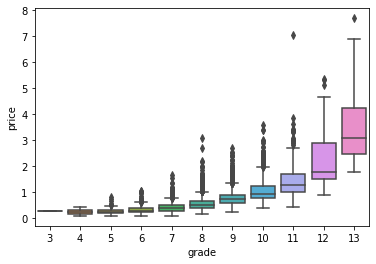

In [29]:
# We'll strip the letters from grade values using a simple function
def get_digit(string):
    for s in string.split():
        if s.isdigit():
            return int(s)

# And then apply this to the grade column.
cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))

#Once we plot the graph again, we can see a clear correlation between price and grade
sns.boxplot(x=cat_df['grade'], y=y_train)

In [30]:
# For the date sold, we shall turn that into years
cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))

# From there, we shall make a new column called year sell_build_year_dff
# This is now arguably a continuous variable so can be placed in the continuous_X dataframe
continuous_X['sell_build_year_dff'] = abs(cat_df['date'] - cat_df['yr_built'])

<ipython-input-30-72e703a2defe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))


<ipython-input-31-3296e2e2c176>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['bathroom_rate'] = cat_df['bathrooms'].apply(lambda x: bathroom_rank(x))


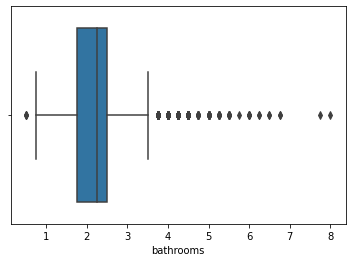

In [31]:
# If we look at the distributions of values in the bathrooms column, we can see that there are only a few bathrooms
# that exceed the IQR range

sns.boxplot(x=cat_df['bathrooms']);

# When modelling, the model will be greatly affected by these values, thus a way to resolve this is by grouping them

# We shall state houses with less than 2 bathrooms are "1", 2-4 are 2-3.5 are "2" and greater than 3.5 are "3"
# This will then be placed in a new column called "bathroom_rating"

def bathroom_rank(value):
    if value <= 2.00:
        return 1
    elif value > 2.00 and value <= 3.50:
        return 2
    else:
        return 3
    
cat_df['bathroom_rate'] = cat_df['bathrooms'].apply(lambda x: bathroom_rank(x))

# We shall still use the bathrooms to feature engineer a new variable.
continuous_X['bathroom_bedroom_ratio'] = cat_df['bathrooms'] / cat_df['bedrooms']


In [32]:
# We'll drop the date column to avoid data leakage
cat_df.drop(columns=['date'], inplace=True)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Let's have another look at our continuous_X distributions.

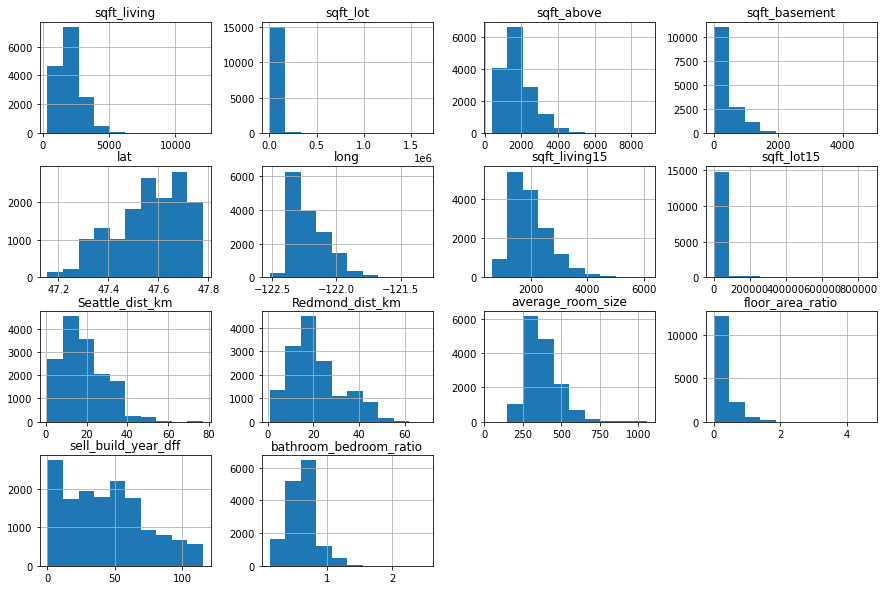

In [33]:
continuous_X.hist(figsize=(15,10));

We can again see skewed distributions. <br>
We also cannot include sell_build_year_diff as it includes a 0 value.


In [34]:
# Now we can return back to our log transformations
for column in list(continuous_X.drop(['sqft_lot', 'sqft_lot15', 'long', 'sqft_basement', 'sell_build_year_dff'], axis=1).columns):
    continuous_X[f'{column}_log'] = np.log(continuous_X[column])

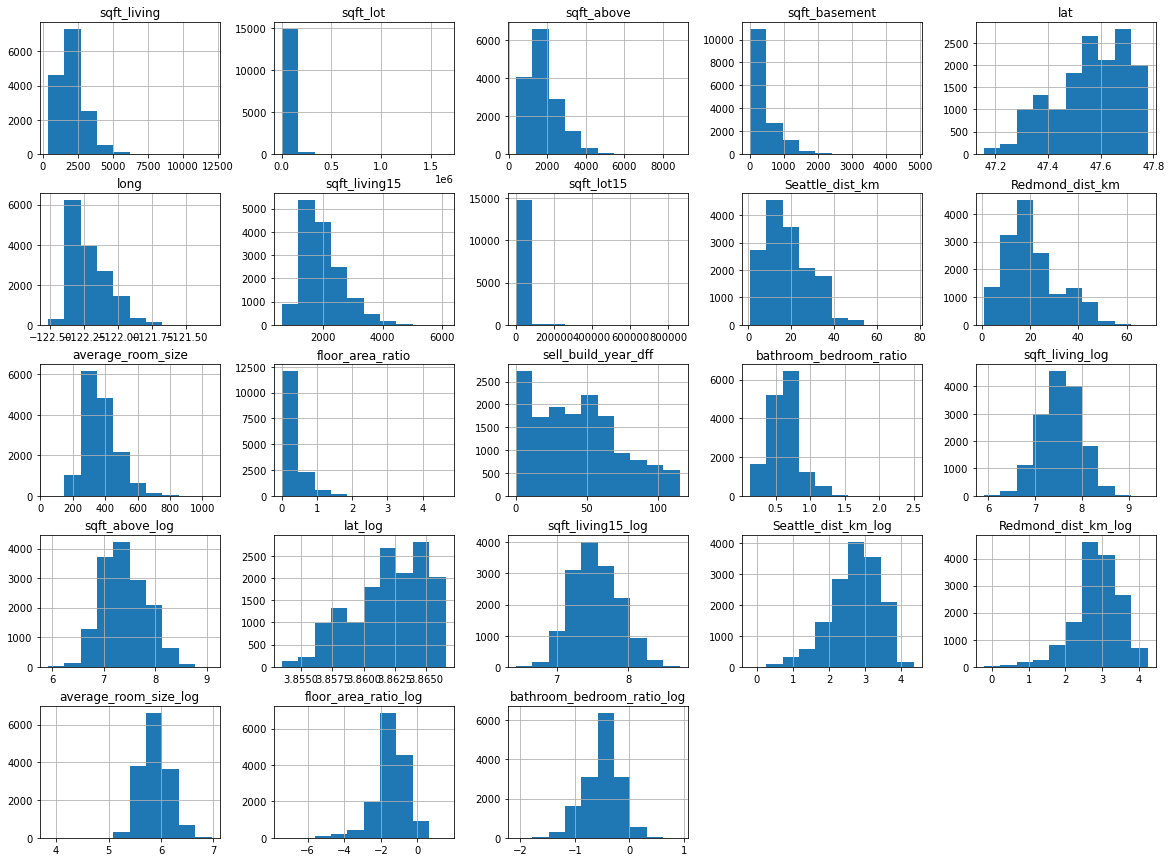

In [35]:
# When creating our visuals again, we see some log transformations did better than others.
continuous_X.hist(figsize=(20,15));

In [36]:
# In any case, we should make dummy variables of the majority of our categorical variables.
#dummies = pd.get_dummies(data=cat_df, columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'], drop_first = True)


In [38]:
# And then we shall concat the continuous features with the categorical features and this shall be our X_train
#X_train = pd.concat([continuous_X, dummies, cat_df.drop(columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'])], axis=1)
X_train = pd.concat([continuous_X, cat_df], axis=1)

## X_test alterations

Now that we have completed the feature engineering on **X_train**, we must do the same transformations to **X_test** so they may be compared against each other.

In [44]:
# This is a function that summarizes all of our transformations
def X_test_alter(X_test):
    cat_X = ['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
    cat_df = X_test[cat_X]
    continuous_X = X_test.drop(cat_X, axis=1)
    
    continuous_X['sqft_basement'] = continuous_X['sqft_basement'].apply(lambda x: 0 if x == '?' else x)
    continuous_X['sqft_basement'] = continuous_X['sqft_basement'].astype(float)
    
    # We fill na values with the same values used from the X_train dataframe
    cat_df['waterfront'].fillna(waterfront_mode, inplace = True)
    cat_df['view'].fillna(view_mode, inplace = True)
    cat_df['yr_renovated'].fillna(yr_renovated_mode, inplace = True)
    
    # We then replace these string values with numerical values
    view_values = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
    condition_values = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
    waterfront_values = ['NO', 'YES']

    values_dict = {'view': view_values, 'condition': condition_values, 'waterfront': waterfront_values}

    for column_name, values_list in values_dict.items():
        for num, value in enumerate(values_list):
            cat_df.loc[cat_df[column_name] == value, column_name] = int(num)
        cat_df[column_name] = cat_df[column_name].astype(int)
        
    # We then focus on feature engineering    
    # Here, we calculate distances using latitude and longitude
    
    continuous_X['lat_long'] = list(zip(continuous_X['lat'], continuous_X['long']))
    continuous_X['Seattle_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
    continuous_X['Redmond_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))

    continuous_X.drop(columns=['lat_long'], inplace=True)
    
    # The features regarding sqft_living
    continuous_X['average_room_size'] = continuous_X['sqft_living'] / (cat_df['bathrooms'] + cat_df['bedrooms'])
    continuous_X['floor_area_ratio'] = continuous_X['sqft_living'] / continuous_X['sqft_lot']
    
    # Convert the grade string values into numerical values
    cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))
    
    # Computations for sell_build_year_dff
    cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))
    continuous_X['sell_build_year_dff'] = abs(cat_df['date'] - cat_df['yr_built'])
    
    # Grouping bathrooms and calculating ratios
    cat_df['bathroom_rate'] = cat_df['bathrooms'].apply(lambda x: bathroom_rank(x))
    continuous_X['bathroom_bedroom_ratio'] = cat_df['bathrooms'] / cat_df['bedrooms']
    
    # We'll drop the date column to avoid data leakage
    cat_df.drop(columns=['date'], inplace=True)
    
    # Log transformations
    for column in list(continuous_X.drop(['sqft_lot', 'sqft_lot15', 'long', 'sqft_basement', 'sell_build_year_dff'], axis=1).columns):
        continuous_X[f'{column}_log'] = np.log(continuous_X[column])
    
    # Creating our dummy variables
    # dummies = pd.get_dummies(data=cat_df, columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'], drop_first = True)

    # Finally concatinating all features
    # X_test_alt = pd.concat([continuous_X, dummies, cat_df.drop(columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'])], axis=1)
    X_test_alt = pd.concat([continuous_X, cat_df], axis = 1)
    
    return X_test_alt


In [46]:
X_test = X_test_alter(X_test)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-44-cb9ea8caed20>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

# Model Building

## Model 1 - { Baseline Model }
This initial model will be extremely basic. It will simply take the price data and the continuous variables **without** the columns we features we engineered. <br>
We will be validating our predictions using the k fold validation method. <br> <br>
**Summary:** <br>
> *Train R squared* = **0.584** <br>
> *Test R squared* = **0.579** <br>
<br>
> *RMSE_test* = **0.579** <br>

In [47]:
from sklearn.linear_model import LinearRegression
model1_linreg = LinearRegression()

model1_scores = cross_validate(
                        model1_linreg, X_train[list(continuous_X.columns)].iloc[:, 0:8], y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [48]:
model1_train_r2 = np.mean(model1_scores['train_r2'])
model1_test_r2 = np.mean(model1_scores['test_r2'])
model1_test_RMSE = np.mean(abs((model1_scores['test_neg_mean_squared_error'])))**0.5
model1_train_RMSE = np.mean(abs((model1_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model1_train_r2, 3)} | Test R squared: {round(model1_test_r2, 3)}')
print(f'Train RMSE: {round(model1_train_RMSE, 3)} | Test RMSE: {round(model1_test_RMSE, 3)}')

Train R squared: 0.584 | Test R squared: 0.579
Train RMSE: 0.24 | Test RMSE: 0.241


In [49]:
model1_linreg.fit(X_train[list(continuous_X.columns)].iloc[:, 0:8], y_train)

LinearRegression()

**Analysis** <br>
An R squared value of 0.58 is a good position to start. <br>
We also see a small difference between the test and training sets which suggests no under or overfitting.

## Model 2

Now we'll incorporate all of the continuous variables that were used.

In [50]:
from sklearn.linear_model import LinearRegression
model2_linreg = LinearRegression()

model2_scores = cross_validate(
                        model2_linreg, X_train[list(continuous_X.columns)], y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [51]:
model2_train_r2 = np.mean(model2_scores['train_r2'])
model2_test_r2 = np.mean(model2_scores['test_r2'])
model2_test_RMSE = np.mean(abs((model2_scores['test_neg_mean_squared_error'])))**0.5
model2_train_RMSE = np.mean(abs((model2_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model2_train_r2, 3)} | Test R squared: {round(model2_test_r2, 3)}')
print(f'Train RMSE: {round(model2_train_RMSE, 3)} | Test RMSE: {round(model2_test_RMSE, 3)}')

Train R squared: 0.69 | Test R squared: 0.681
Train RMSE: 0.208 | Test RMSE: 0.209


In [65]:
model2_linreg.fit(X_train[list(continuous_X.columns)], y_train)

LinearRegression()

## Model 3

We'll now include both our continuous and categorical features which have **NOT** been dummied.

In [52]:
from sklearn.linear_model import LinearRegression
model3_linreg = LinearRegression()

model3_scores = cross_validate(
                        model3_linreg, X_train, y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [53]:
model3_train_r2 = np.mean(model3_scores['train_r2'])
model3_test_r2 = np.mean(model3_scores['test_r2'])
model3_test_RMSE = np.mean(abs((model3_scores['test_neg_mean_squared_error'])))**0.5
model3_train_RMSE = np.mean(abs((model3_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model3_train_r2, 3)} | Test R squared: {round(model3_test_r2, 3)}')
print(f'Train RMSE: {round(model3_train_RMSE, 3)} | Test RMSE: {round(model3_test_RMSE, 3)}')

Train R squared: 0.767 | Test R squared: 0.758
Train RMSE: 0.18 | Test RMSE: 0.181


In [57]:
model3_linreg.fit(X_train, y_train)

LinearRegression()

So far, model 3 seems to be our best model.

## Testing against X_test

Now that we have our best model, it is time to test it against the unseen X_test and y_test.

In [63]:
# Model 1
model1_linreg.score(X_test[list(continuous_X.columns)].iloc[:, 0:8], y_test)

0.6095387709675011

In [66]:
# Model 2
model2_linreg.score(X_test[list(continuous_X.columns)], y_test)

0.6942127732051736

In [67]:
# Model 3
model3_linreg.score(X_test, y_test)

0.7713889460720328

In [54]:
# Clearly, model 3 is our best model
best_model = model3_linreg

<br>

<br>

<br>

# Experimentation

## Model 4

In [68]:
from sklearn.linear_model import LinearRegression
model4_linreg = LinearRegression()

model4_scores = cross_validate(
                        model4_linreg, X_train.drop(['long', 'sqft_lot15', 'sell_build_year_dff'], axis=1), y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [69]:
model4_train_r2 = np.mean(model4_scores['train_r2'])
model4_test_r2 = np.mean(model4_scores['test_r2'])
model4_test_RMSE = np.mean(abs((model4_scores['test_neg_mean_squared_error'])))**0.5
model4_train_RMSE = np.mean(abs((model4_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model4_train_r2, 3)} | Test R squared: {round(model4_test_r2, 3)}')
print(f'Train RMSE: {round(model4_train_RMSE, 3)} | Test RMSE: {round(model4_test_RMSE, 3)}')

Train R squared: 0.763 | Test R squared: 0.754
Train RMSE: 0.181 | Test RMSE: 0.183


In [72]:
model4_linreg.fit(X_train.drop(['long', 'sqft_lot15', 'sell_build_year_dff'], axis=1), y_train)

LinearRegression()

In [74]:
model4_linreg.score(X_test.drop(['long', 'sqft_lot15', 'sell_build_year_dff'], axis=1), y_test)

0.7679025910207574

<br>

<br>

<br>

In [30]:
from sklearn.cluster import KMeans

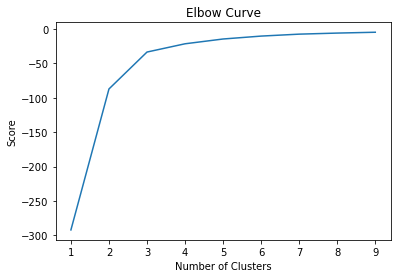

In [31]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = continuous_X[['lat']]
X_axis = continuous_X[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

We can see that the rate of change of score decreases significantly after 3 clusters. The **elbow point** i.e. 3/4

In [32]:
# For our analysis, we'll form 4 clusters.
kmeans = KMeans(n_clusters = 4, init ='k-means++')

# Compute k-means clustering.
kmeans.fit(continuous_X[['lat', 'long']]) 

# We then create a column which assings a label of 0 to 3 to each record where each label refers to a cluster.
# As this is a categorical variable, we should include it into the cat_df dataframe
cat_df['area_group'] = kmeans.fit_predict(continuous_X[['lat', 'long']])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = cat_df['area_group']  

# We can now see the new column
cat_df.head()

<ipython-input-32-bf1f88d98c11>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['area_group'] = kmeans.fit_predict(continuous_X[['lat', 'long']])


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,area_group
8093,2014,2,2.00,1.0,0,0,4,6,1940,0.0,98146,2
13884,2014,3,1.00,1.0,0,0,2,6,1961,0.0,98146,2
406,2014,3,2.00,3.0,0,0,2,8,2001,0.0,98103,1
21317,2015,4,3.25,2.0,0,2,2,11,2015,0.0,98006,3
7766,2014,3,1.50,1.0,0,0,2,7,1962,0.0,98198,2


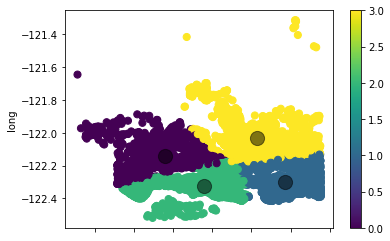

In [33]:
# We can visualise the 4 areas
continuous_X.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


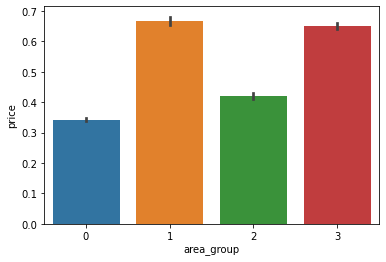

In [34]:
# We can then visualise the average price per area
sns.barplot(cat_df['area_group'], y_train);

<br>

<br>

We'll attempt the same for **zipcodes**. However, K means clusters do not work in 1 Dimension so we must pair zipcodes with another variable.

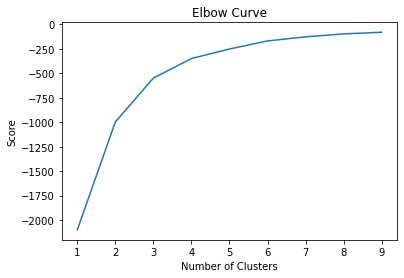

In [35]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = pd.DataFrame(y_train)
X_axis = cat_df['zipcode']
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

This time we get around 4 for the optimal number of clusters.

In [36]:
# For our analysis, we'll form 4 clusters.
kmeans = KMeans(n_clusters = 4, init ='k-means++')

# Compute k-means clustering.
kmeans.fit(pd.concat([y_train, cat_df['zipcode']], axis=1)) 

# We then create a column which assings a label of 0 to 3 to each record where each label refers to a cluster.
cat_df['area_wealth'] = kmeans.fit_predict(pd.concat([y_train, cat_df['zipcode']], axis=1))

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(pd.concat([y_train, cat_df['area_wealth']], axis=1)) 
cat_df.head()

<ipython-input-36-2cfb045b6394>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['area_wealth'] = kmeans.fit_predict(pd.concat([y_train, cat_df['zipcode']], axis=1))


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,area_group,area_wealth
8093,2014,2,2.00,1.0,0,0,4,6,1940,0.0,98146,1,1
13884,2014,3,1.00,1.0,0,0,2,6,1961,0.0,98146,1,1
406,2014,3,2.00,3.0,0,0,2,8,2001,0.0,98103,1,3
21317,2015,4,3.25,2.0,0,2,2,11,2015,0.0,98006,0,2
7766,2014,3,1.50,1.0,0,0,2,7,1962,0.0,98198,2,1


/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


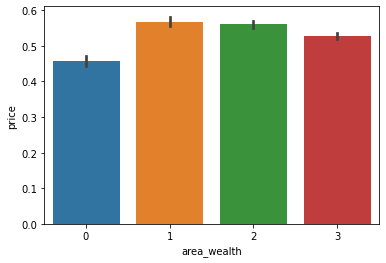

In [51]:
sns.barplot(cat_df['area_wealth'], y_train);